In [49]:
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d
import laspy

import random
import math

In [50]:
las = laspy.read('banska2.las')
ground_data = las[las.classification == 2] 
points_data = np.stack([ground_data.Z], axis = 0).transpose((1,0))

points_sum = 0
data_min = min(points_data)

for i in range(len(points_data)):
    points_sum += points_data[i][0] - data_min[0]

avg_ground_height = math.floor(points_sum / len(points_data) + data_min[0])

In [51]:
las = laspy.read('banska2.las')
tree_data = las[las.classification == 5]
points_data = np.stack([tree_data.Z], axis = 0).transpose((1,0))

points_data = sorted(points_data, key=lambda x: x[0], reverse=True)
points_data = points_data[:100]

points_sum = 0
data_min = min(points_data)

for i in range(len(points_data)):
    points_sum += points_data[i][0] - data_min[0]

avg_tree_height = math.floor(points_sum / len(points_data) + data_min[0])
tree_eps = (avg_tree_height - avg_ground_height) // 4
tree_eps

522

In [52]:
las = laspy.read('banska2.las')
las = las[las.classification == 5] # stromy

points_data = np.stack([las.X,las.Y,las.Z], axis = 0).transpose((1,0))
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(points_data)
#o3d.visualization.draw_geometries([geom])

In [53]:
geom = geom.remove_radius_outlier(3,1000)[0]

In [54]:
random_colors = []
labels = np.array(geom.cluster_dbscan(tree_eps, 10))

for label in labels:
    if label == -1:
        random_colors.append([0,0,0])
    else:    
        random_colors.append([random.random()*0.8 +0.2,random.random()*0.8 +0.2,random.random()*0.8 +0.2])
colors = [random_colors[x] for x in labels]
geom.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([geom])

In [55]:
print(len(np.array(geom.points)))
stromy_bez_neklasifikovanych = [x for i,x in enumerate(np.array(geom.points)) if labels[i] != -1]
labels = np.array([x for x in labels if x != -1])
print(len(labels))
print(len(stromy_bez_neklasifikovanych))
geom.points = o3d.utility.Vector3dVector(stromy_bez_neklasifikovanych)

33678
33534
33534


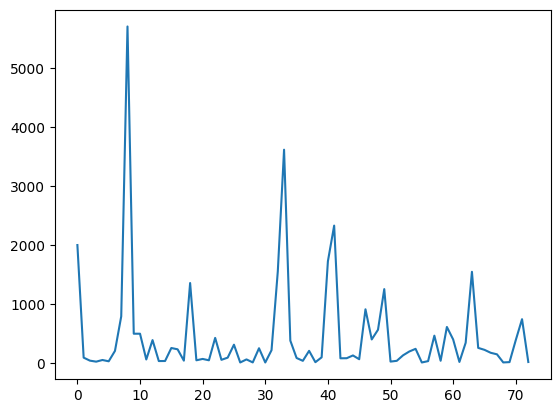

In [56]:
pocty = []
colors = []
max_label = labels.max()
for i in set(labels):
   pocty.append((i, labels.tolist().count(i)))
plt.figure()
plt.plot([x for x in range(max_label+1)],[x[1] for x in pocty])
plt.show()

In [57]:
najvacsie_po_najmensie = sorted(pocty,key=lambda x: x[1],reverse=True)
hodnoty_najvacsie_po_najmensie = [x[1] for x in najvacsie_po_najmensie]
priemer = np.average(hodnoty_najvacsie_po_najmensie) 
nadpriemerne_indexy_tried = [x[0] for x in najvacsie_po_najmensie if x[1] > priemer*2]
nadpriemerne_body = []
final_list = []
for index,bod in enumerate(stromy_bez_neklasifikovanych):
    if labels[index] in nadpriemerne_indexy_tried:
        nadpriemerne_body.append(bod)
    else:
        final_list.append((bod,labels[index]))

In [21]:
# print((final_list))
#toto treba prerobit
najvacsie_clustre = []
for _ in range(len(nadpriemerne_indexy_tried)):
    indexy_aktualneho_clustera = [x for x in range(len(np.array(geom.points))) if labels[x] == nadpriemerne_indexy_tried[_]]
    if(len(indexy_aktualneho_clustera) > 0):
        najvacsie_clustre.append(np.array(geom.points)[indexy_aktualneho_clustera])



7


In [58]:
#Od tejto bunky zacina zabava a postupne sa dopracujeme az po spojenie tych bodov
new_points = []
for item in final_list:
    new_points.append(item[0])
    if item[1] == -1:
        random_colors.append([0,0,0])
    else:    
        random_colors.append([random.random()*0.8 +0.2,random.random()*0.8 +0.2,random.random()*0.8 +0.2])

geom3 = o3d.geometry.PointCloud()
geom3.points = o3d.utility.Vector3dVector(new_points)
colors = [random_colors[x[1]] for x in final_list]
geom3.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([geom3])



In [71]:
nove_body = []
random_colors = []
for index,bod in enumerate(stromy_bez_neklasifikovanych):
    if labels[index] == 8:
        nove_body.append(bod)

geom2 = o3d.geometry.PointCloud()
geom2.points = o3d.utility.Vector3dVector(nove_body)

labels2 = np.array(geom2.cluster_dbscan(150, 10))

for label in labels2:
    if label == -1:
        random_colors.append([0,0,0])
    else:    
        random_colors.append([random.random()*0.8 +0.2,random.random()*0.8 +0.2,random.random()*0.8 +0.2])


print(labels2)
colors2 = [random_colors[x] for x in labels2]
geom2.colors = o3d.utility.Vector3dVector(colors2)
o3d.visualization.draw_geometries([geom2])



[ 0  0  0 ... 20 20 20]


In [74]:

print(labels2)
max_label = max(labels) + 1
print(max_label)
new__labels = []
previous_label = 0

labels2 = sorted(labels2)
for label in labels2:
    if label > previous_label:
        max_label += 1
    new__labels.append(max_label)
    
    previous_label = label

print(new__labels)

    

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:

for index,bod in enumerate(geom2.points):
    final_list.append((bod,new__labels[index]))


In [76]:
new_points = []
for item in final_list:
    new_points.append(item[0])
    if item[1] == -1:
        random_colors.append([0,0,0])
    else:    
        random_colors.append([random.random()*0.8 +0.2,random.random()*0.8 +0.2,random.random()*0.8 +0.2])

In [79]:
geom4 = o3d.geometry.PointCloud()
geom4.points = o3d.utility.Vector3dVector(new_points)
colors = [random_colors[x[1]] for x in final_list]
geom4.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([geom4])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
